## Loading medical image data
In this notebook, the non-scoliotic and scoliotic data for the project is showcased. This data can be used to write an algorithm to find the optimal viewing angle for clinicians using a C-arm.

In [1]:
# Library imports
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os

## Bone MRI DICOM images

In [2]:
def load_3d_dicom(patient_path):
    # Create image paths 
    filenames = os.listdir(patient_path)

    # Load all DICOM data 
    dicom_files = [pydicom.dcmread(os.path.join(patient_path, f)) for f in filenames]

    # Sort slices by image position
    dicom_files.sort(key=lambda x: float(x.ImagePositionPatient[0]))

    # Convert to 3D numpy array
    dicom_image = np.stack([
        f.pixel_array*f.RescaleSlope + f.RescaleIntercept 
        for f in dicom_files
    ], axis=0)

    return dicom_image

patient_path = "boneMRI/20240119_BoneMRI_EBS23"
dicom_image = load_3d_dicom(patient_path)
print(f"The shape of the image is {dicom_image.shape}")

The shape of the image is (100, 672, 672)


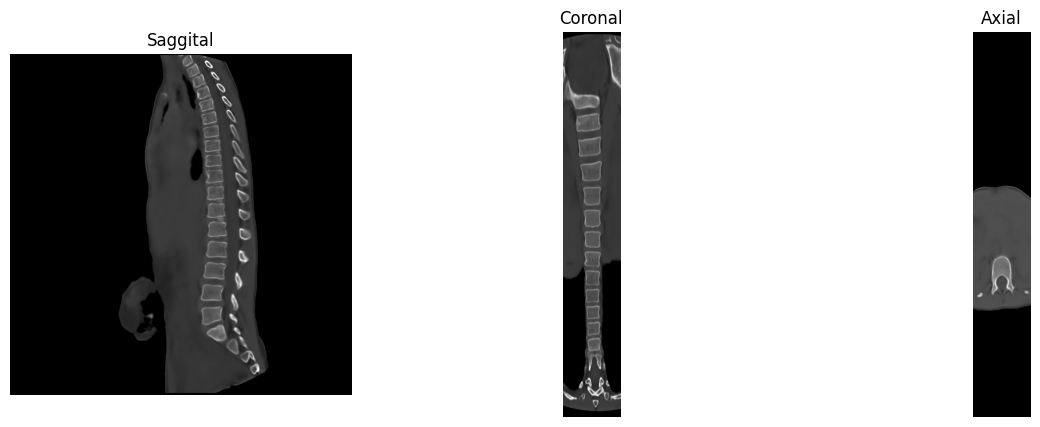

In [9]:
def plot_bonemri(image, window_center, window_width, slice_idx=None):
    # Get middle slices if slice_idx not specified
    if slice_idx is None:
        slice_idx = {
            "sagittal": image.shape[0] // 2,
            "axial": image.shape[1] // 2,
            "coronal": image.shape[2] // 2
        }

    # Apply window and normalize to 0-255
    lower = window_center - window_width/2
    upper = window_center + window_width/2
    image = np.clip(image, lower, upper)
    image = (image - lower)/(upper - lower)*255

    # Create figure with one row and two columns
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    [axes.set_axis_off() for axes in ax.flatten()]

    # Sagittal Slice
    ax[0].imshow(image[slice_idx["sagittal"],:,:], cmap="gray")
    ax[0].set_title("Saggital")
    # Axial Slice
    ax[2].imshow(np.rot90(image[:,slice_idx["axial"],:], k=3), cmap="gray")
    ax[2].set_title("Axial")
    # Coronal Slice
    ax[1].imshow(np.rot90(image[:,:,slice_idx["coronal"]]), cmap="gray")
    ax[1].set_title("Coronal")

    plt.show()

slice_idx = {
    "sagittal": dicom_image.shape[0] // 2,
    "axial": dicom_image.shape[1] // 2,
    "coronal": 400
}
plot_bonemri(dicom_image, 450, 1500, slice_idx)